In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import json
#path = Path('../save_data/Classificatior_data/')
pathv1 = Path('Classificatior_data/inChannelDist')
pathv2 = Path('Classificatior_data/ch0Mask')
if not pathv1.exists():
    print("No data found in the specified path.")
if not pathv2.exists():
    print("No data found in the specified path.")

path = pathv1

In [12]:
#import re
#
#jsons = sorted(
#    path.glob('*.json'),
#    key=lambda f: int(re.search(r'v(\d+)', f.name).group(1))
#)
#
#print(f'Found {len(jsons)} JSON files in {path}')
#
#histories = []
#for json_file in jsons:
#    print(f'Reading {json_file}')
#    with open(json_file, 'r') as file:
#        histories.append(file.read())
#

loss:
  min = 0.10206061353043576 (from v14)
  max = 1.2480848322260163 (from v17)
val_loss:
  min = 0.5273789649897177 (from v12)
  max = 2.6935520296348745 (from v18)
val_acc:
  min = 0.2604166666666667 (from v17)
  max = 0.8255208333333334 (from v12)


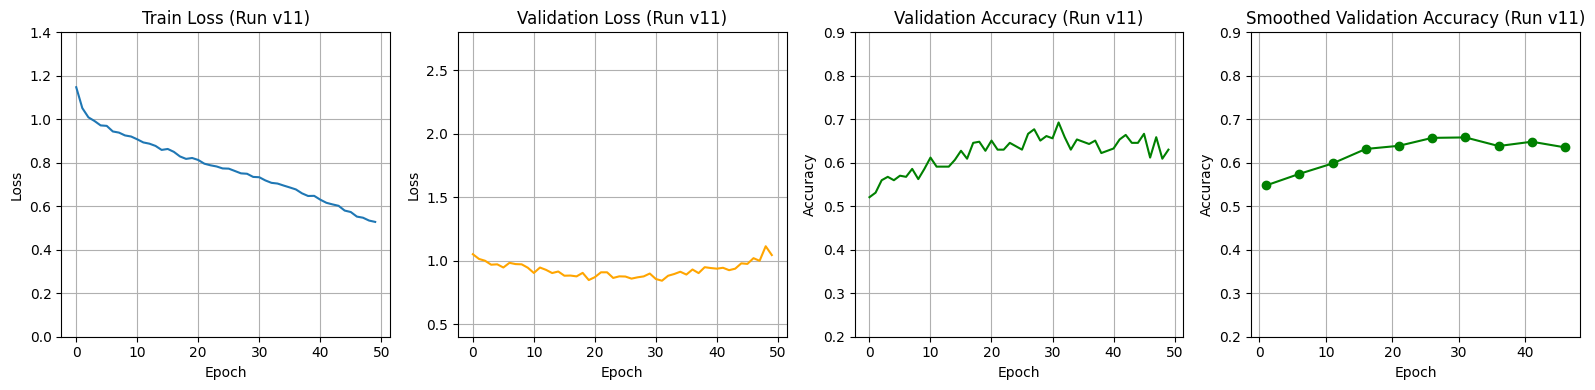

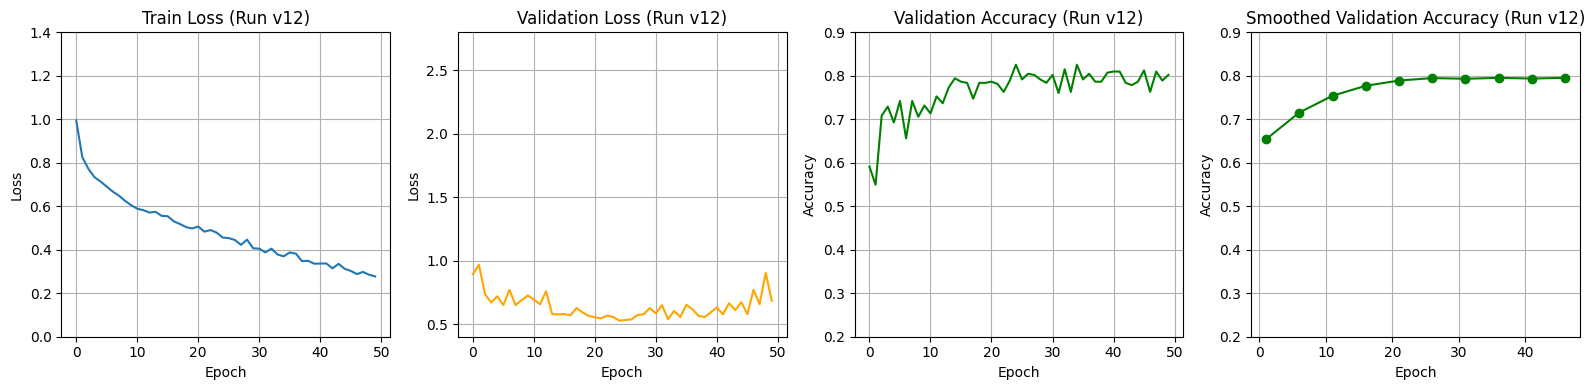

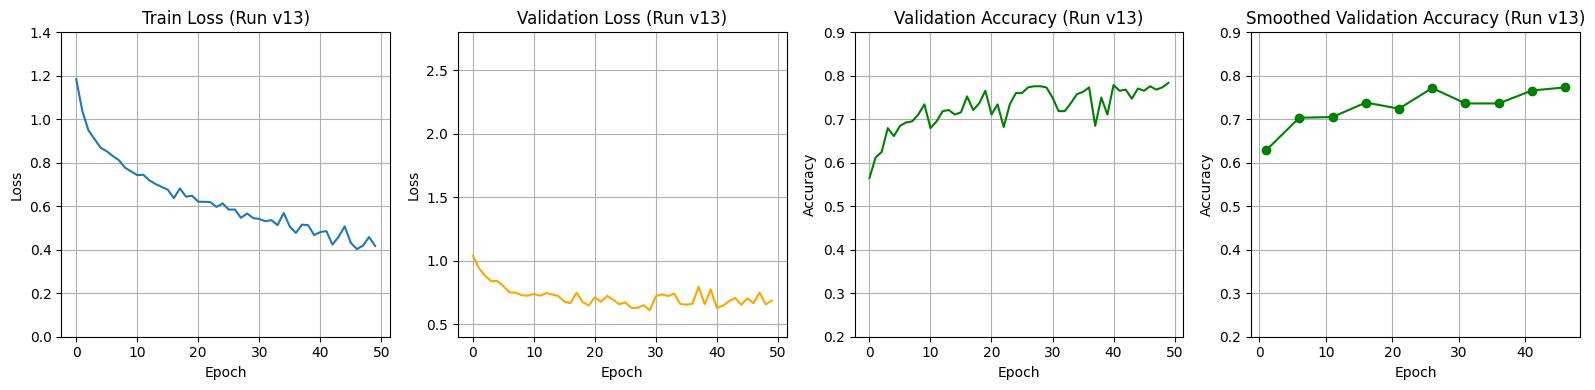

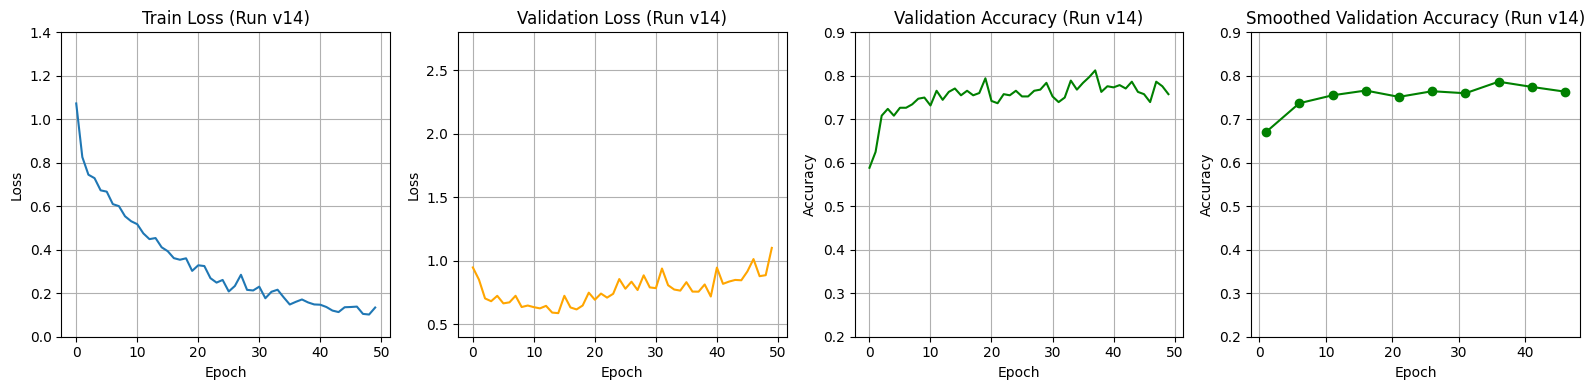

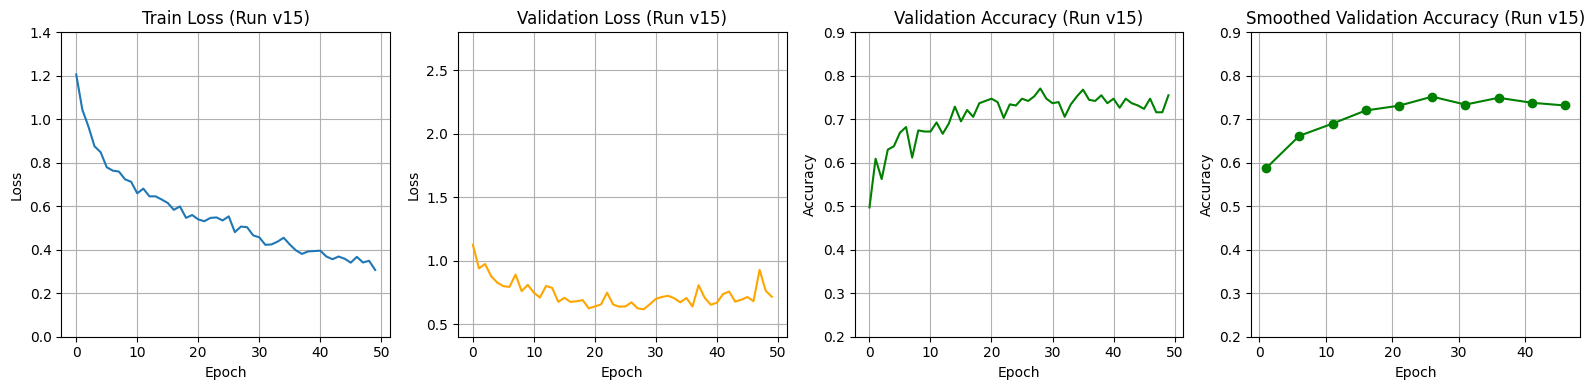

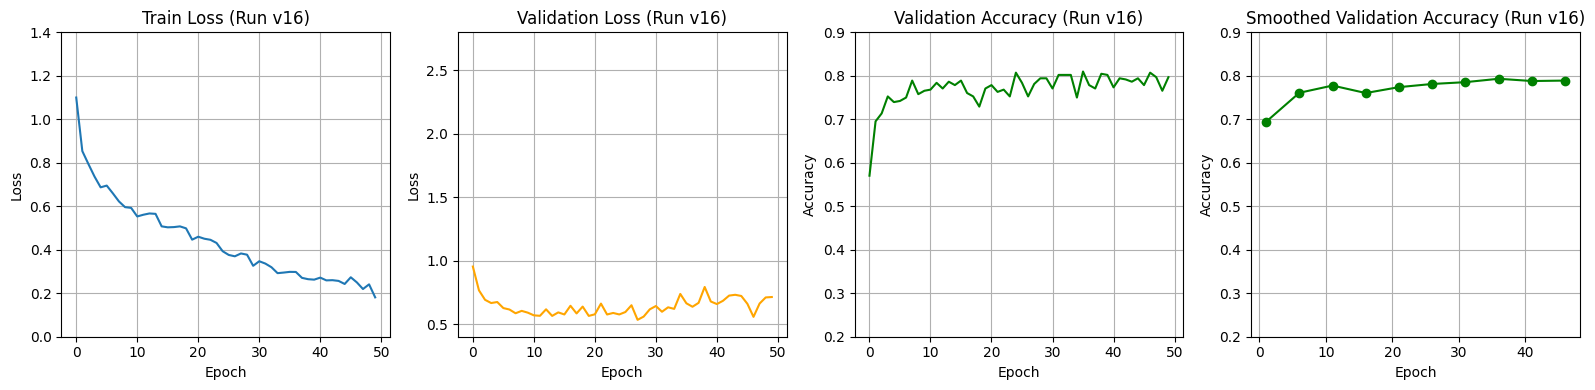

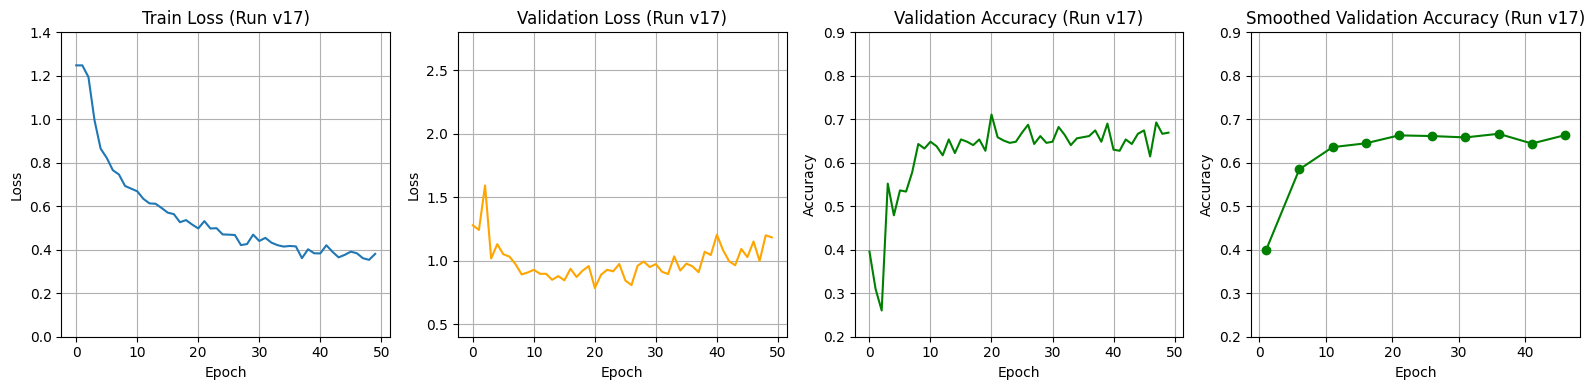

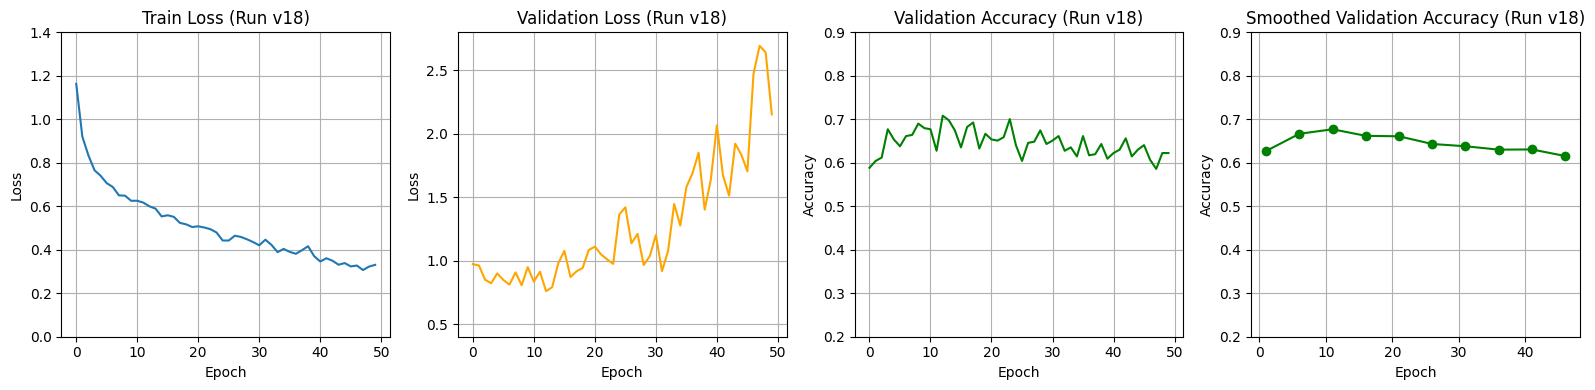

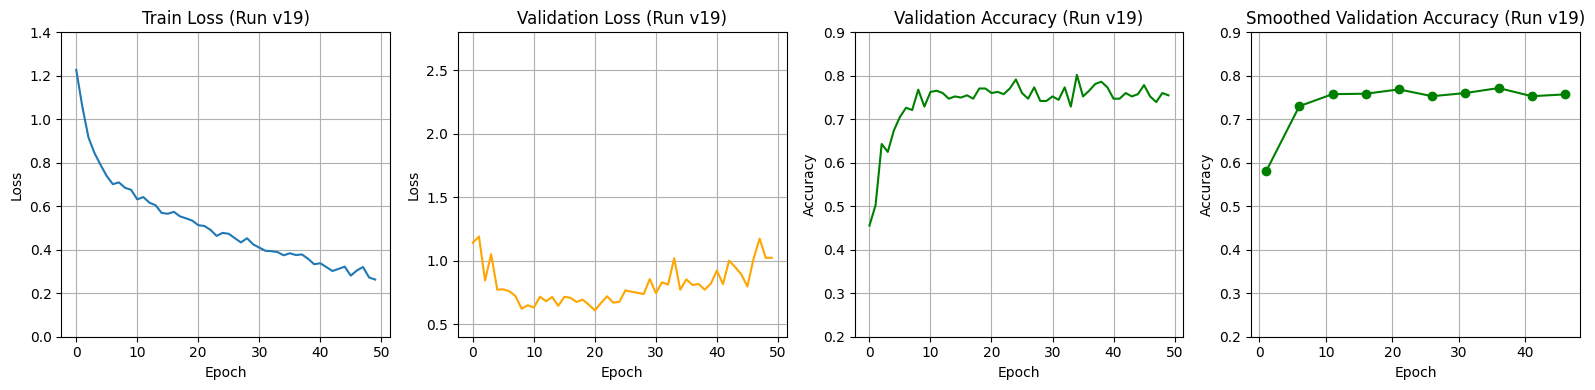

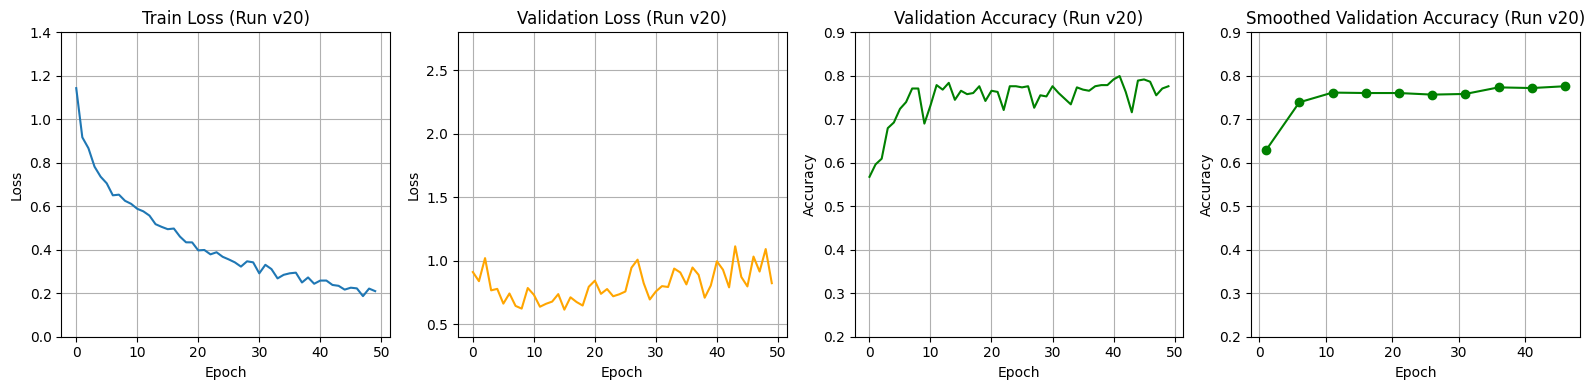

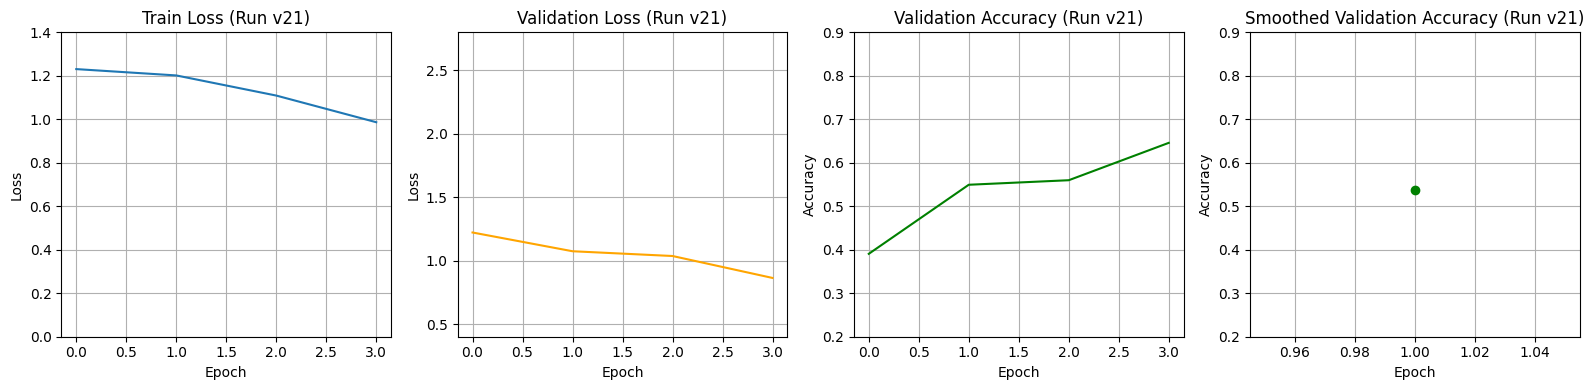

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np
import re
path = pathv1
# Grouped average function
def grouped_average(values, group_size):
    return [np.mean(values[i:i + group_size]) for i in range(0, len(values), group_size)]

group_size = 5  # average over 5 epochs

histories = []
versions = []

# Sort by version number 
jsons = sorted(
    path.glob('*.json'),
    key=lambda f: int(re.search(r'v(\d+)', f.name).group(1))
)

# Read data and record version numbers
for json_file in jsons:
    version = int(re.search(r'v(\d+)', json_file.name).group(1))
    versions.append(version)
    with open(json_file, 'r') as file:
        histories.append(json.loads(file.read()))

stats = {}
for version, history in zip(versions, histories):  
    for key, values in history.items():
        if isinstance(values, list) and all(isinstance(v, (int, float)) for v in values):
            vmin, vmax = min(values), max(values)
            if key not in stats:
                stats[key] = {"min": float("inf"), "max": float("-inf")}
            if vmin < stats[key]["min"]:
                stats[key]["min"] = vmin
                stats[key]["file_min"] = version

            if vmax > stats[key]["max"]:
                stats[key]["max"] = vmax
                stats[key]["file_max"] = version
for key, s in stats.items():
    print(f"{key}:")
    print(f"  min = {s['min']} (from v{s['file_min']})")
    print(f"  max = {s['max']} (from v{s['file_max']})")

for history, version in zip(histories, versions):
    val_acc = history['val_acc']
    val_acc_grouped = grouped_average(val_acc, group_size)
    val_acc_epochs = [i + 1 for i in range(0, len(val_acc), group_size)]

    plt.figure(figsize=(16, 4))

    # Loss
    plt.subplot(1, 4, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.title(f'Train Loss (Run v{version})')  # Use real version number
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
#    plt.ylim(0.5, 1.2) 
    plt.ylim(np.floor(stats['loss']["min"] / 0.2) * 0.2,np.ceil(stats['loss']["max"] / 0.2) * 0.2)
    #print(stats['loss']["min"])
    #print(stats['loss']["min"])
    #print(np.floor(stats['loss']["min"] / 0.2) * 0.2)
    #print(np.ceil(stats['loss']["min"] / 0.2) * 0.2)
    # Val loss
    plt.subplot(1, 4, 2)
    plt.plot(history['val_loss'], label='Val Loss', color='orange')
    plt.title(f'Validation Loss (Run v{version})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.ylim(np.floor(stats['val_loss']["min"] / 0.2) * 0.2,np.ceil(stats['val_loss']["max"] / 0.2) * 0.2)
    #    plt.ylim(0.8,1.2)

    plt.subplot(1, 4, 3)
    plt.plot(history['val_acc'], label='Val Accuracy', color='green')
    plt.title(f'Validation Accuracy (Run v{version})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.ylim(np.floor(stats['val_acc']["min"] / 0.1) * 0.1,np.ceil(stats['val_acc']["max"] / 0.1) * 0.1)
    # plt.ylim(0.5, 0.7)

    # Smoothed val accuracy
    plt.subplot(1, 4, 4)
    plt.plot(val_acc_epochs, val_acc_grouped, label='Val Acc (Avg/5)', color='green', marker='o')
    plt.title(f'Smoothed Validation Accuracy (Run v{version})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.ylim(np.floor(stats['val_acc']["min"] / 0.1) * 0.1,np.ceil(stats['val_acc']["max"] / 0.1) * 0.1)
    #plt.ylim(0.5, 0.7)
    
    plt.tight_layout()
    plt.show()


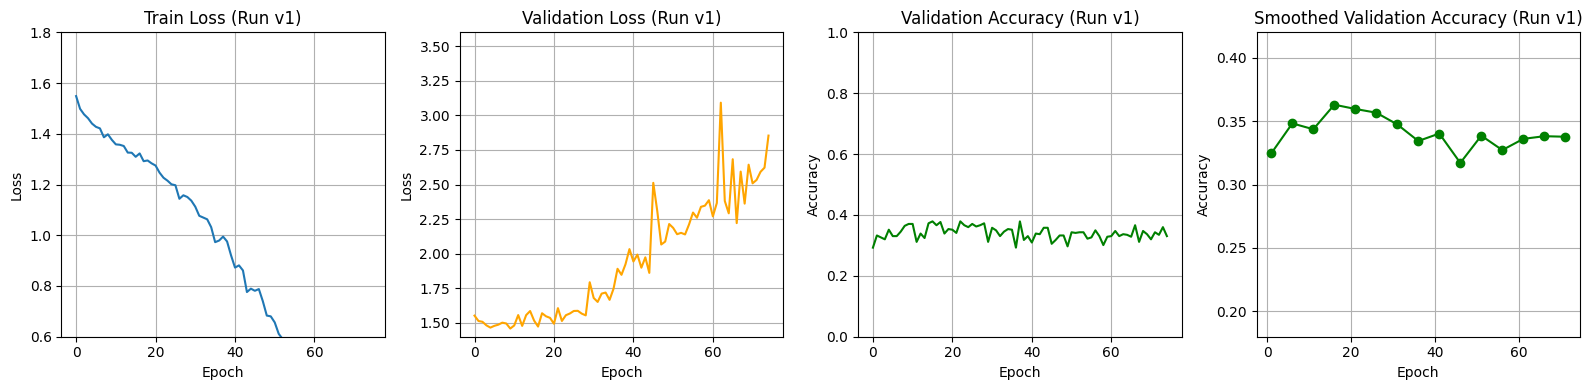

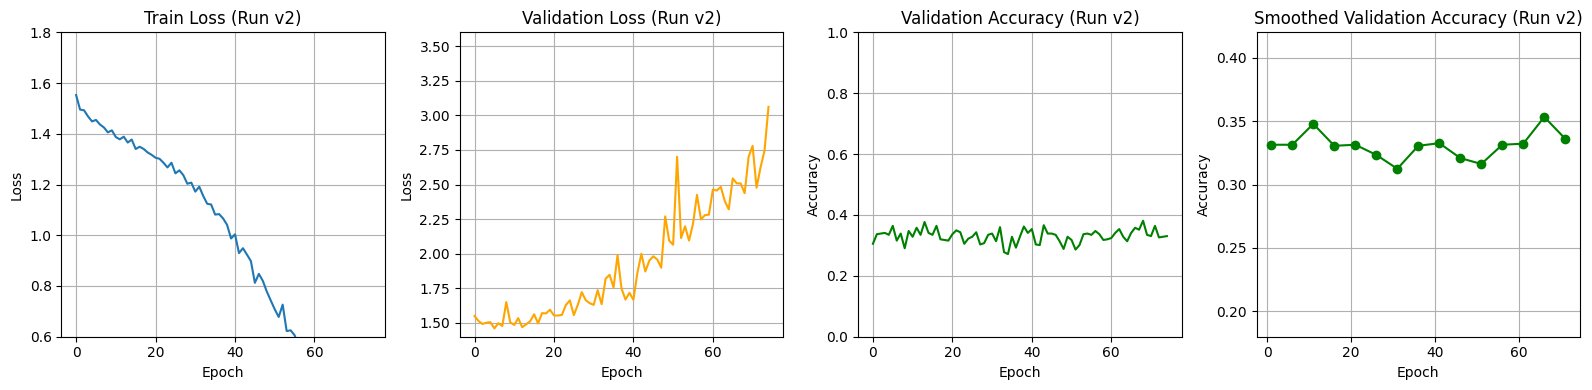

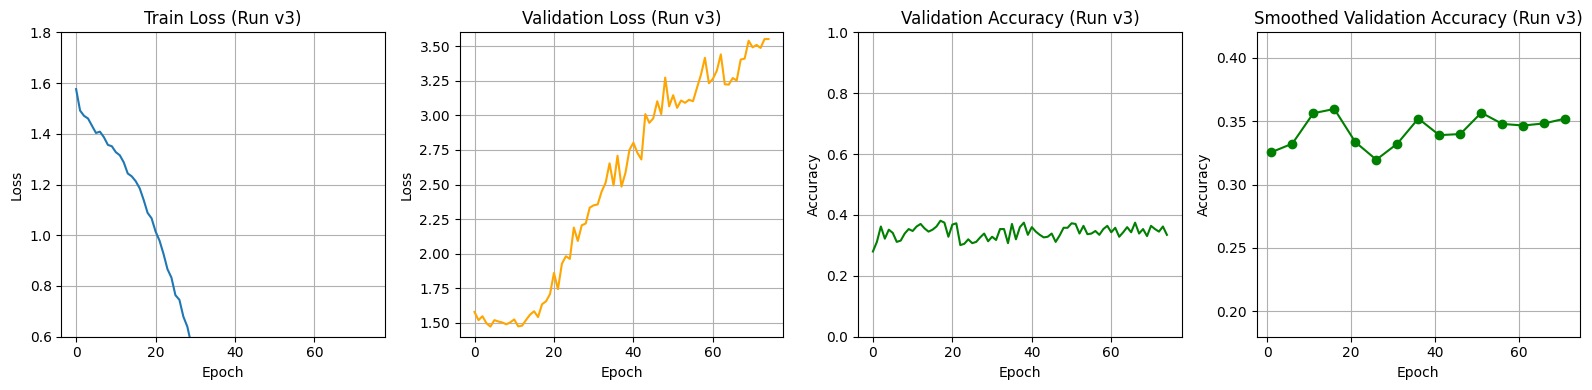

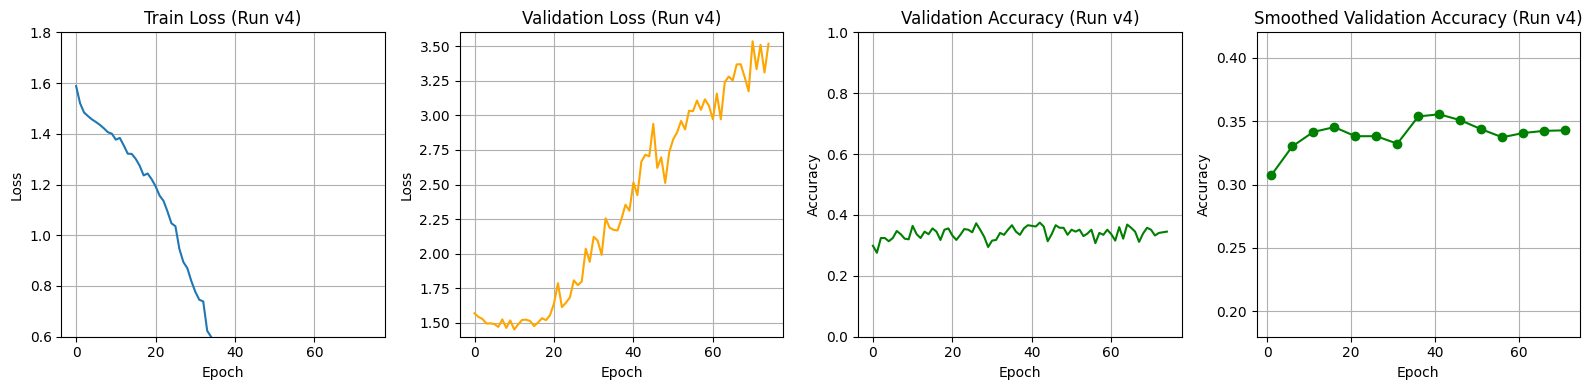

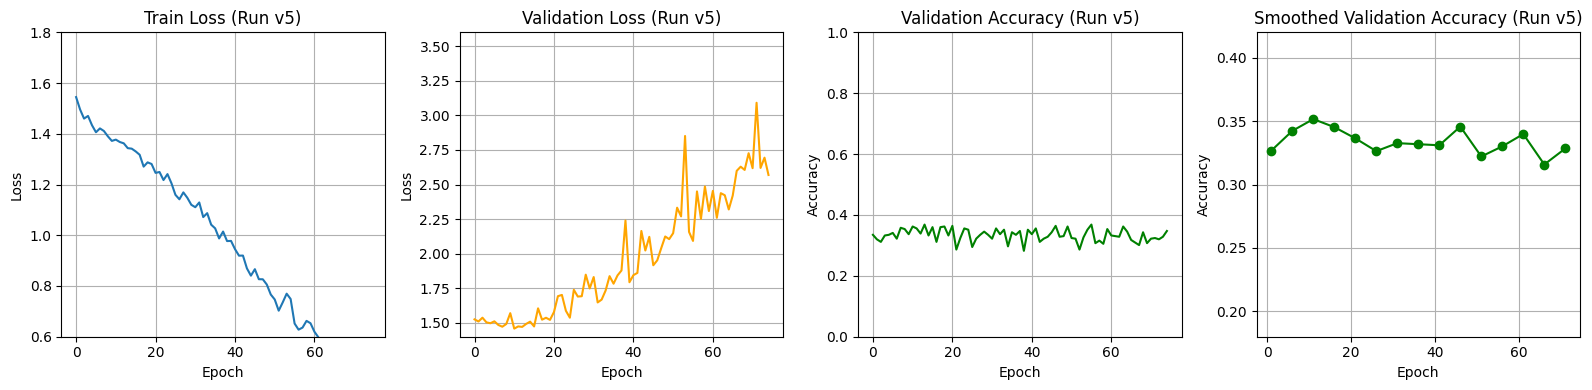

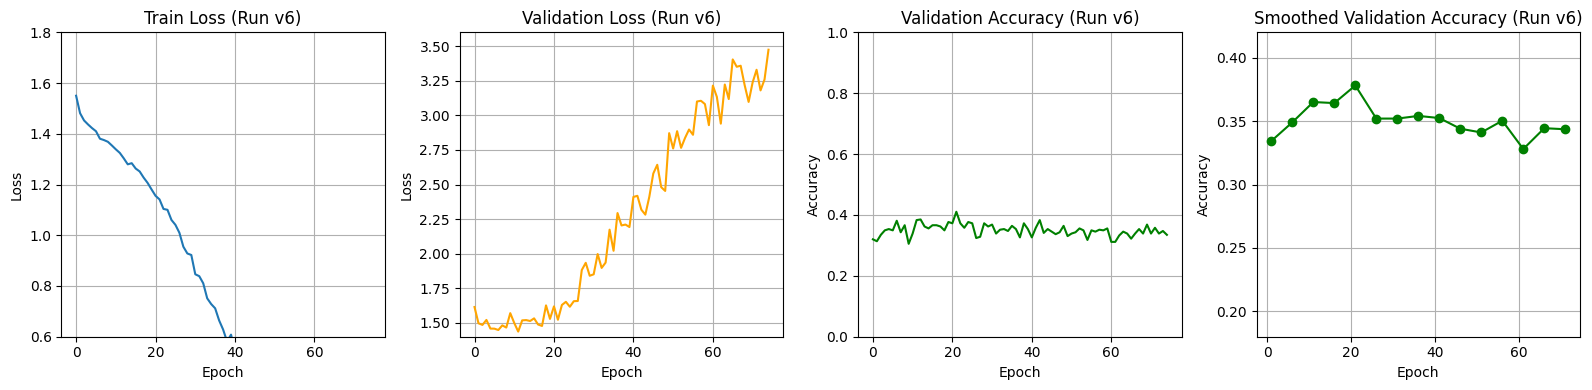

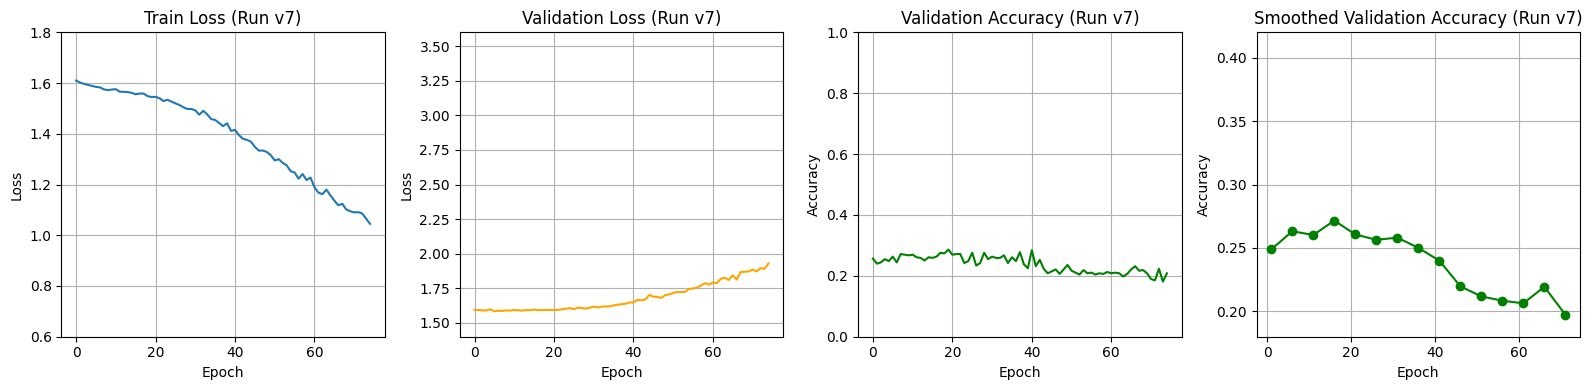

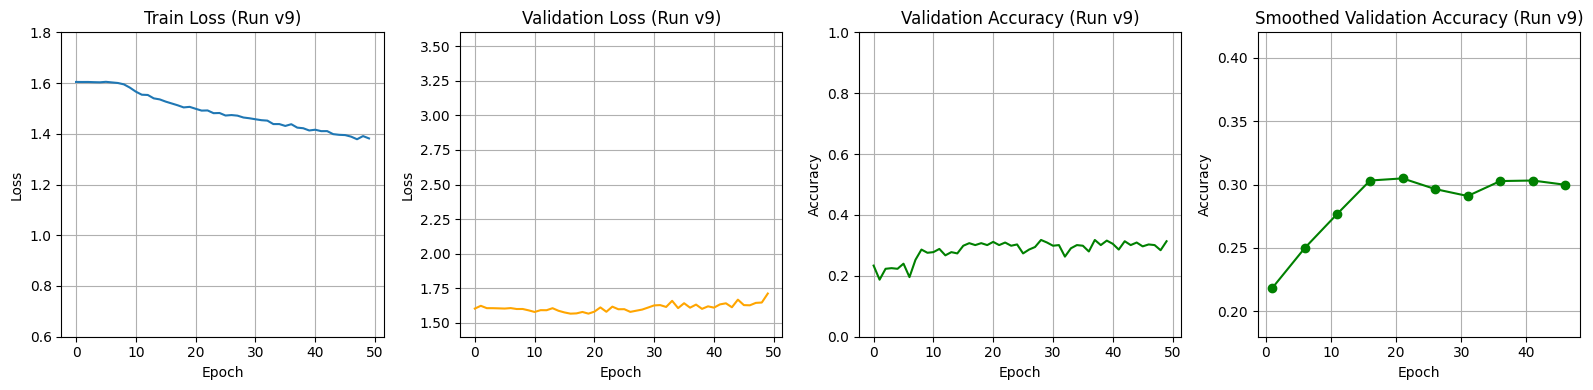

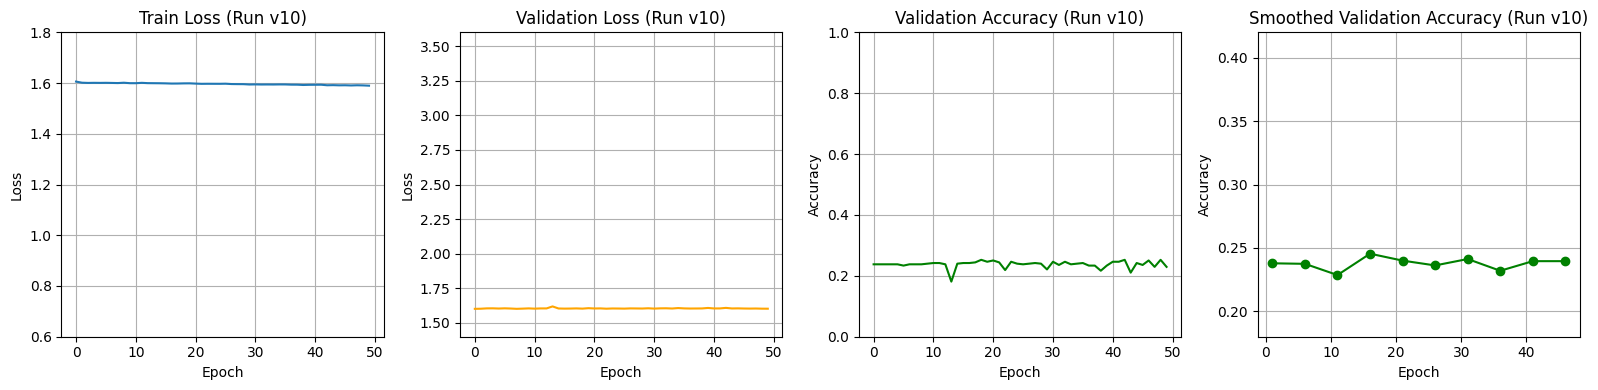

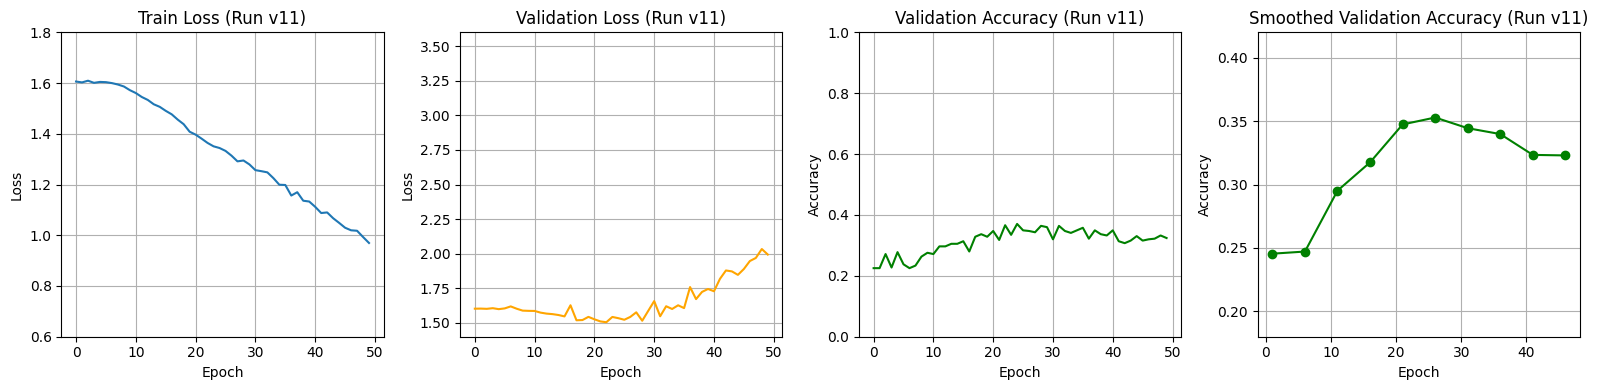

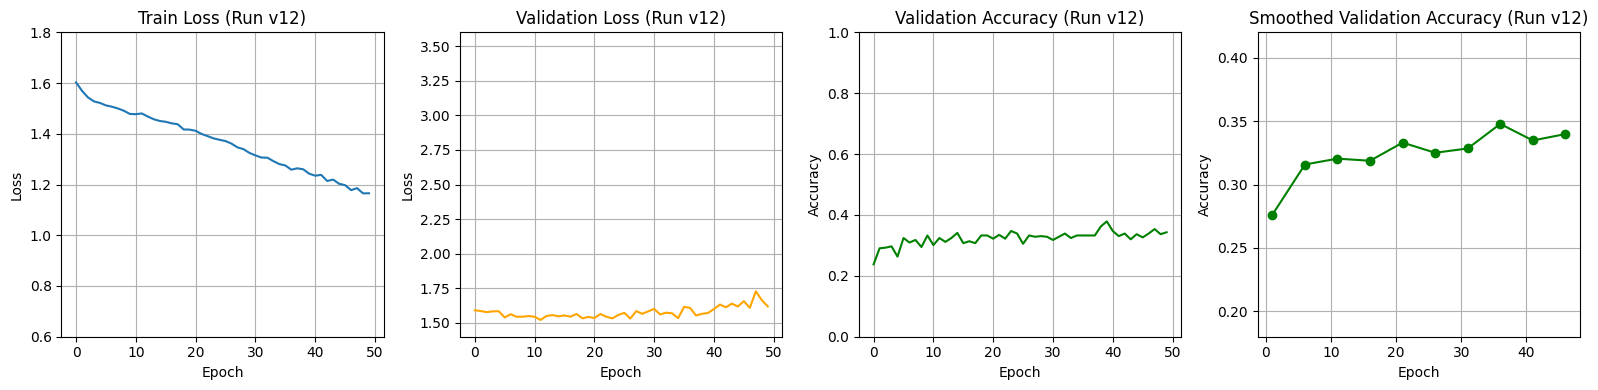

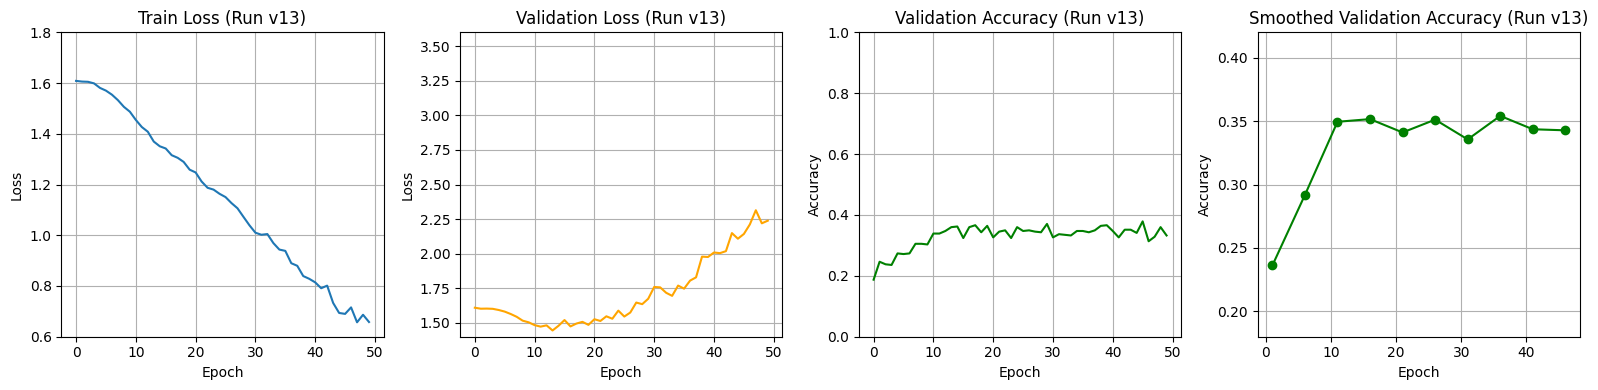

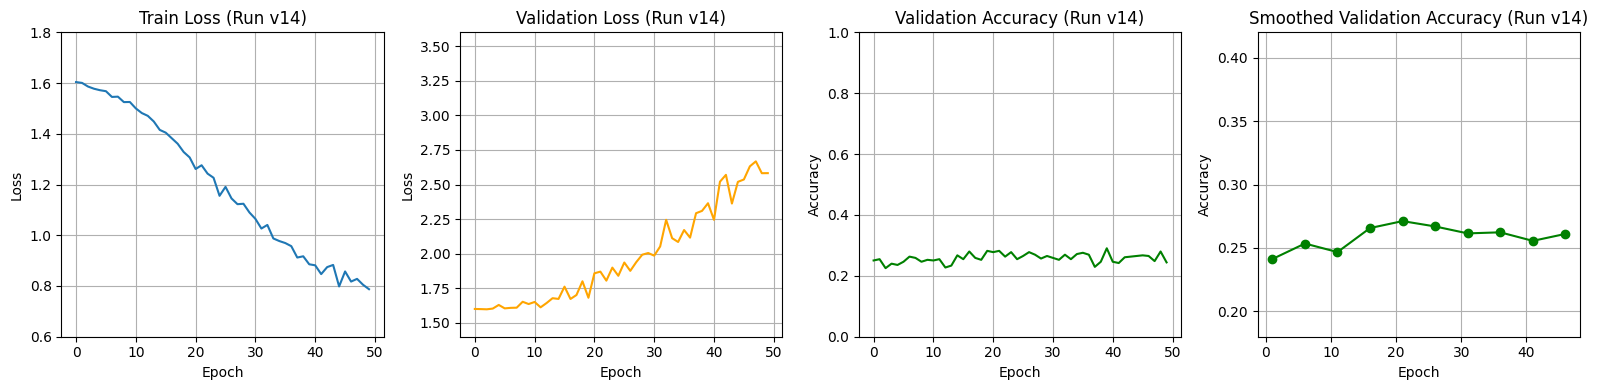

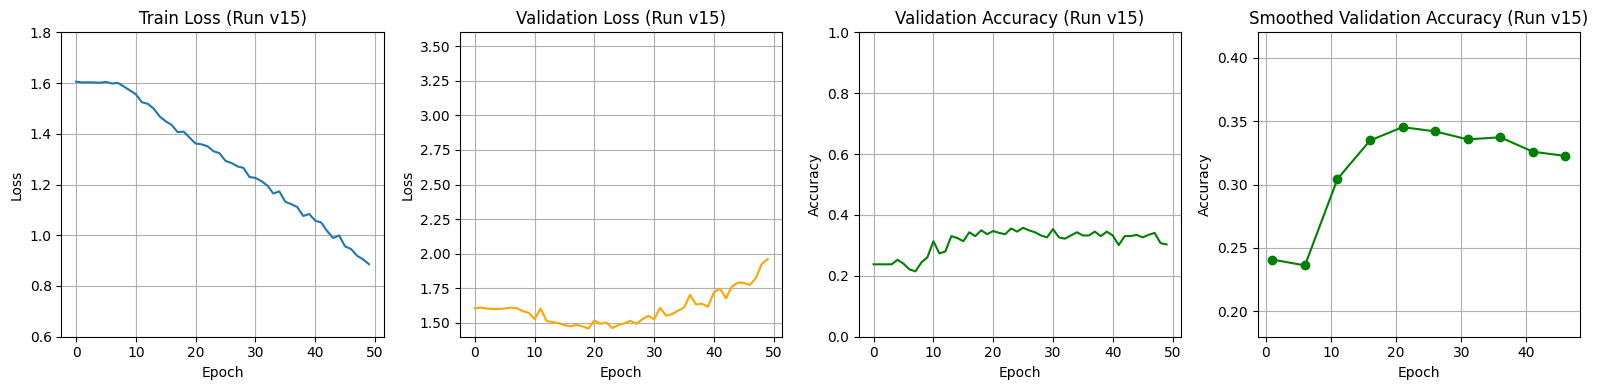

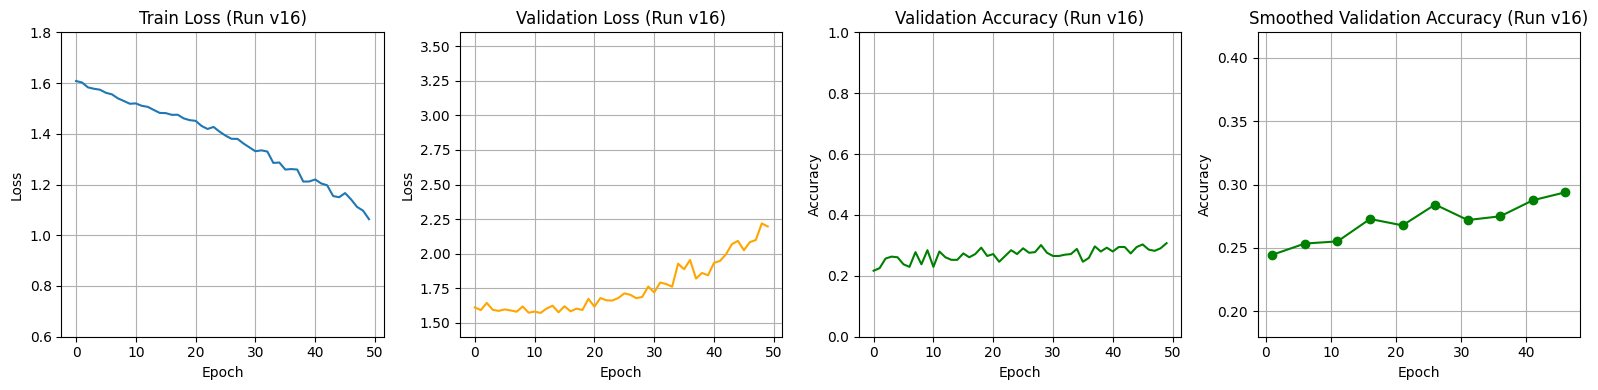

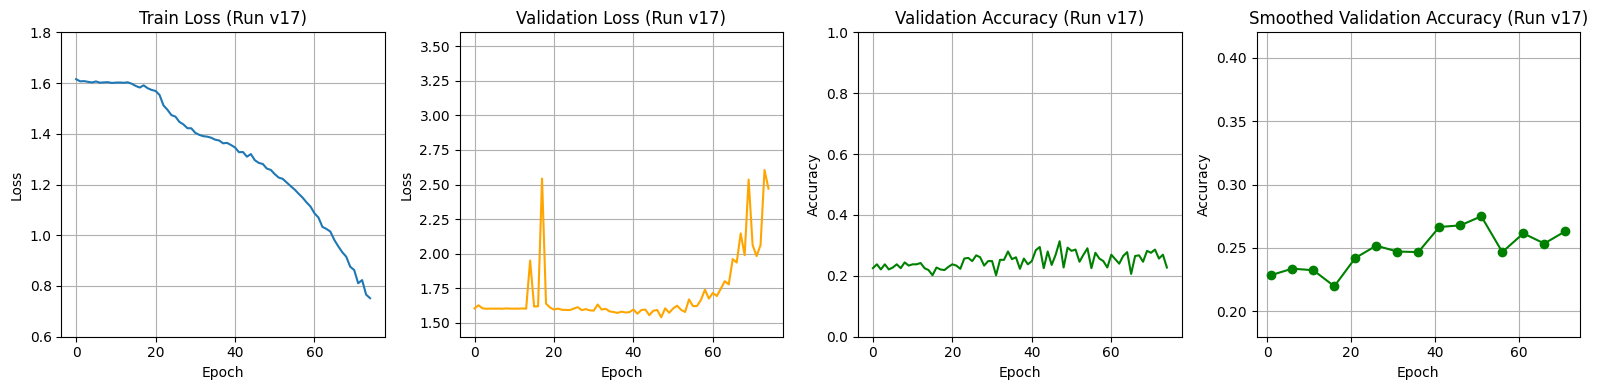

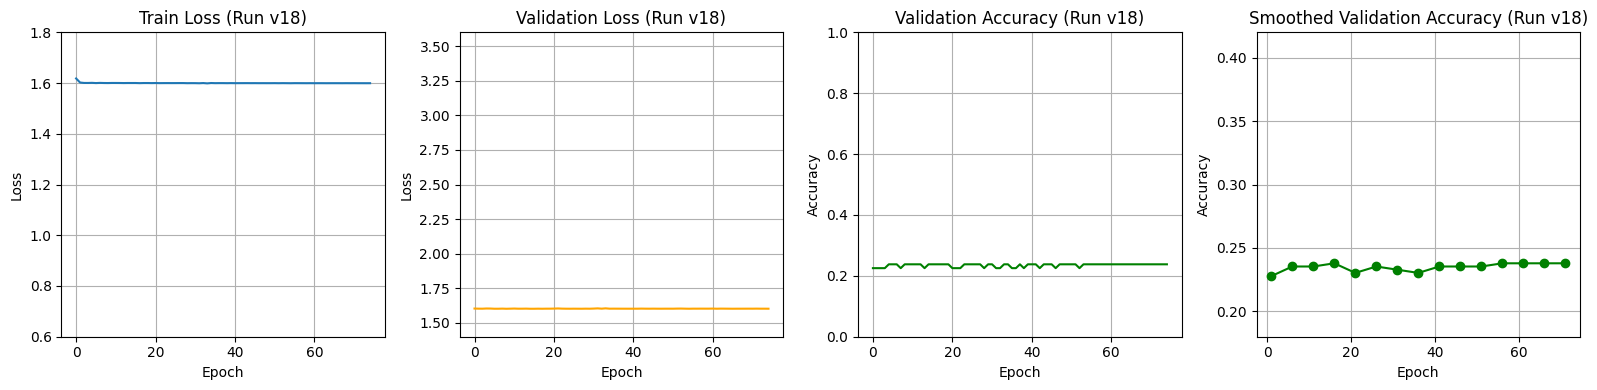

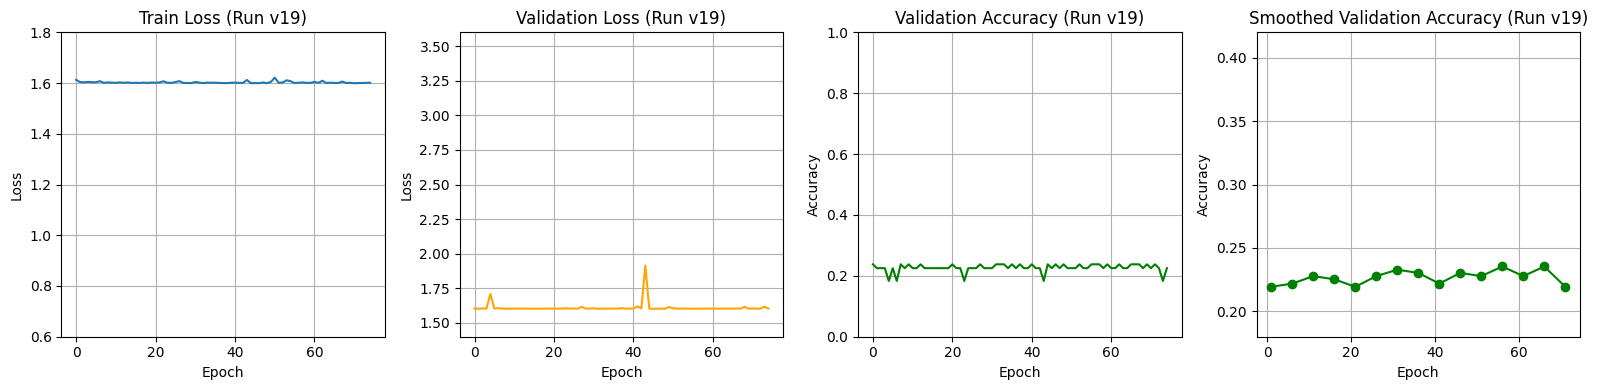

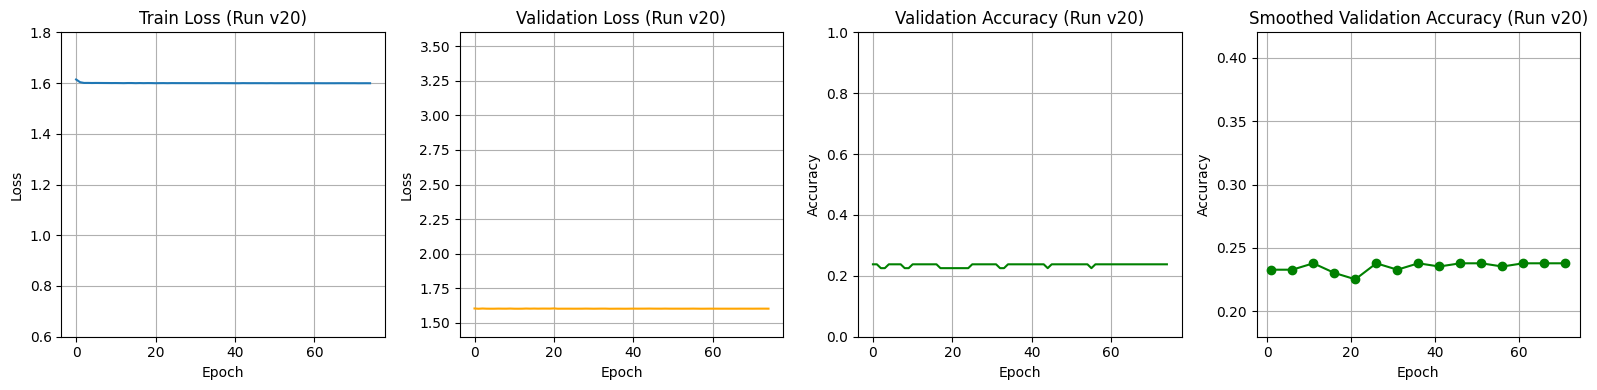

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Grouped average function
def grouped_average(values, group_size):
    return [np.mean(values[i:i + group_size]) for i in range(0, len(values), group_size)]

group_size = 5  # average over 5 epochs

histories = []
versions = []

# Sort by version number 
jsons = sorted(
    path.glob('*.json'),
    key=lambda f: int(re.search(r'v(\d+)', f.name).group(1))
)

# Read data and record version numbers
for json_file in jsons:
    version = int(re.search(r'v(\d+)', json_file.name).group(1))
    versions.append(version)
    with open(json_file, 'r') as file:
        histories.append(json.loads(file.read()))

# Plot each history {'loss': {'min': 0.07272758660838008, 'max': 1.6213791866430236}, 'val_loss': {'min': 1.43709717123132, 'max': 3.5515135719901636}, 'val_acc': {'min': 0.18105263157894738, 'max': 0.4105263157894737}}
for history, version in zip(histories, versions):
    val_acc = history['val_acc']
    val_acc_grouped = grouped_average(val_acc, group_size)
    val_acc_epochs = [i + 1 for i in range(0, len(val_acc), group_size)]

    plt.figure(figsize=(16, 4))

    # Loss
    plt.subplot(1, 4, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.title(f'Train Loss (Run v{version})')  # Use real version number
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.ylim(0.6, 1.8)

    # Val loss
    plt.subplot(1, 4, 2)
    plt.plot(history['val_loss'], label='Val Loss', color='orange')
    plt.title(f'Validation Loss (Run v{version})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.ylim(1.4,3.6)

    plt.subplot(1, 4, 3)
    plt.plot(history['val_acc'], label='Val Accuracy', color='green')
    plt.title(f'Validation Accuracy (Run v{version})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.ylim(0, 1.0)

    # Smoothed val accuracy
    plt.subplot(1, 4, 4)
    plt.plot(val_acc_epochs, val_acc_grouped, label='Val Acc (Avg/5)', color='green', marker='o')
    plt.title(f'Smoothed Validation Accuracy (Run v{version})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.ylim(0.18, 0.42)
    
    plt.tight_layout()
    plt.show()


In [ ]:
for i, history_str in enumerate(histories):
    history = json.loads(history_str)  
    print(f"Training loss: {history['loss']}")
    print(f"Validation Accuracy: {history['val_acc']}")
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.title(f'Train Loss (Run v{version})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    
    
    plt.subplot(1, 2, 2)
    plt.plot(history['val_acc'], label='Val Accuracy', color='green')
    plt.title(f'Validation Accuracy (Run v{version})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Show the plots for this run
    plt.tight_layout()
    plt.show()

In [5]:
import json

# Find min and max for each key across all histories
stats = {}
for history in histories:
    for key, values in history.items():
        if isinstance(values, list) and all(isinstance(v, (int, float)) for v in values):
            if key not in stats:
                stats[key] = {"min": float("inf"), "max": float("-inf")}
            stats[key]["min"] = min(stats[key]["min"], min(values))
            stats[key]["max"] = max(stats[key]["max"], max(values))

print(stats)


{'loss': {'min': 0.27743866559312563, 'max': 1.1849204028646152}, 'val_loss': {'min': 0.5273789649897177, 'max': 1.1133653283222884}, 'val_acc': {'min': 0.5208333333333334, 'max': 0.8255208333333334}}
